In [90]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [91]:
db = []
names=[]
for filename in glob.glob("*.csv"):
    if filename != "Acacoyahua.csv" and filename != "FCHCP.csv" and filename != "FLPCP.csv" and filename != "LAENCRUCIJADA.csv" and filename != "SNJERONIMO.csv" and filename != "SuchiateII" and filename != "TALISMAN.csv" and filename != "TAOCP.csv" and filename!= "Adolfo.csv" :
        data = pd.read_csv(filename, skiprows = [i for i in range (7)])
        db.append(data)
        names.append(filename)

In [92]:
Nombres=np.array(names)

In [93]:
names

['Salvacion.csv',
 'ARGOVIA.csv',
 'TRegulador.csv',
 'Huehuetan.csv',
 'Dorado.csv',
 'Cacahoatan.csv',
 'FHidalgo.csv',
 'FincaChirita.csv',
 'Mazatan.csv',
 'FincaPatria.csv',
 'Adolfo Ruiz Cortines.csv',
 'MedioMonte.csv',
 'Malpaso.csv',
 'Suchiate2.csv',
 'TalismanI.csv',
 'SJ.csv',
 'FincaChicharras.csv',
 'HUIXTLA.csv',
 'SD.csv',
 'Finca Argovia.csv',
 'Argelia2.csv']

In [94]:
for i in range(len(db)):
    db[i] = db[i].rename(columns = {" Temperatura Media(ºC)": "TemperaturaMedia"})
    db[i]["TemperaturaMedia"] = db[i].TemperaturaMedia.replace("-", np.nan).astype(float)
    db[i]["Fecha"] = pd.to_datetime(db[i]["Fecha"], dayfirst = True)
    db[i]["Año"] = db[i]["Fecha"].dt.year
    db[i]["Mes"] = db[i]["Fecha"].dt.month
    db[i]["Día"] = db[i]["Fecha"].dt.day
    db[i].drop([" Precipitación(mm)"],axis=1)
    db[i]=db[i].loc[(db[i].Año >= 1954) & (db[i].Mes == 5)]
    db[i]=db[i].reset_index()
    db[i]=db[i].drop(["index"],axis=1)

In [95]:
#Creemos urbano y rural
for i in range(len(db)):
    if names[i]=="Cacahoatan.csv" or names[i]=="FHidalgo.csv" or names[i]=="HUIXTLA.csv" or names[i]=="MedioMonte.csv" or names[i]=="SD.csv" or names[i]=="SJ.csv" or names[i]=="TalismanI.csv" or names[i]=="Suchiate2.csv" or names[i]=="Salvacion.csv" or names[i]=="Mazatan.csv":
        db[i]["Tipo"]=["urbano" for i in range(len(db[i]))]
    else:
        db[i]["Tipo"]=["rural" for i in range(len(db[i]))]

In [96]:
tipos = pd.concat(db, ignore_index = True)
tipos

,Fecha,Precipitación(mm),TemperaturaMedia,Temperatura Máxima(ºC),Temperatura Mínima(ºC),Evaporación(mm),Año,Mes,Día,Tipo
0,1978-05-01,0.00,29.25,36.50,22.00,7.30,1978,5,1,urbano
1,1978-05-02,0.00,28.50,36.00,21.00,5.40,1978,5,2,urbano
2,1978-05-03,0.00,28.50,37.00,20.00,4.60,1978,5,3,urbano
3,1978-05-04,0.00,29.00,37.00,21.00,7.40,1978,5,4,urbano
4,1978-05-05,0.00,29.50,37.00,22.00,6.90,1978,5,5,urbano
...,...,...,...,...,...,...,...,...,...,...
37102,2022-05-27,NaN,NaN,NaN,NaN,NaN,2022,5,27,rural
37103,2022-05-28,NaN,NaN,NaN,NaN,NaN,2022,5,28,rural
37104,2022-05-29,NaN,NaN,NaN,NaN,NaN,2022,5,29,rural
37105,2022-05-30,NaN,NaN,NaN,NaN,NaN,2022,5,30,rural


<Axes: xlabel='Año', ylabel='TemperaturaMedia'>

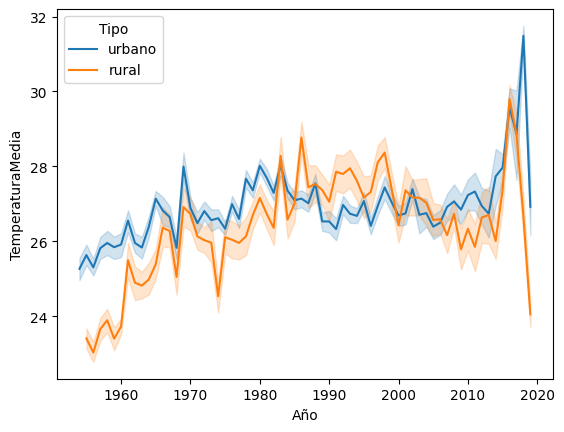

In [97]:
sns.lineplot(data=tipos, x="Año",y="TemperaturaMedia", hue="Tipo")

In [98]:
copia = tipos
copia

,Fecha,Precipitación(mm),TemperaturaMedia,Temperatura Máxima(ºC),Temperatura Mínima(ºC),Evaporación(mm),Año,Mes,Día,Tipo
0,1978-05-01,0.00,29.25,36.50,22.00,7.30,1978,5,1,urbano
1,1978-05-02,0.00,28.50,36.00,21.00,5.40,1978,5,2,urbano
2,1978-05-03,0.00,28.50,37.00,20.00,4.60,1978,5,3,urbano
3,1978-05-04,0.00,29.00,37.00,21.00,7.40,1978,5,4,urbano
4,1978-05-05,0.00,29.50,37.00,22.00,6.90,1978,5,5,urbano
...,...,...,...,...,...,...,...,...,...,...
37102,2022-05-27,NaN,NaN,NaN,NaN,NaN,2022,5,27,rural
37103,2022-05-28,NaN,NaN,NaN,NaN,NaN,2022,5,28,rural
37104,2022-05-29,NaN,NaN,NaN,NaN,NaN,2022,5,29,rural
37105,2022-05-30,NaN,NaN,NaN,NaN,NaN,2022,5,30,rural


In [99]:
copia = copia.dropna(subset=["TemperaturaMedia", "Año"])
copia = copia.reset_index()

In [100]:
copia

,index,Fecha,Precipitación(mm),TemperaturaMedia,Temperatura Máxima(ºC),Temperatura Mínima(ºC),Evaporación(mm),Año,Mes,Día,Tipo
0,0,1978-05-01,0.00,29.25,36.50,22.00,7.30,1978,5,1,urbano
1,1,1978-05-02,0.00,28.50,36.00,21.00,5.40,1978,5,2,urbano
2,2,1978-05-03,0.00,28.50,37.00,20.00,4.60,1978,5,3,urbano
3,3,1978-05-04,0.00,29.00,37.00,21.00,7.40,1978,5,4,urbano
4,4,1978-05-05,0.00,29.50,37.00,22.00,6.90,1978,5,5,urbano
...,...,...,...,...,...,...,...,...,...,...,...
23290,36894,2016-05-05,0.00,27.00,34.00,20.00,NaN,2016,5,5,rural
23291,36904,2016-05-15,10.00,26.00,34.00,18.00,NaN,2016,5,15,rural
23292,36911,2016-05-22,4.00,26.50,34.00,19.00,NaN,2016,5,22,rural
23293,36919,2016-05-30,8.20,26.50,34.00,19.00,NaN,2016,5,30,rural


In [101]:
# Ingresando los datos en vectores independientes.
xrural = []
yrural = []
xurbano = []
yurbano = []
for i in range(len(copia)):
    if copia["Tipo"][i] == "rural":
        xrural.append(copia["Año"][i])
        yrural.append(copia["TemperaturaMedia"][i])
    else:
        xurbano.append(copia["Año"][i])
        yurbano.append(copia["TemperaturaMedia"][i])
#Bases de datos separadas de urbano y rural

dfurbano = pd.DataFrame({"Año": xrural, "TemperaturaMedia" : yrural})
dfrural = pd.DataFrame({"Año": xurbano, "TemperaturaMedia": yurbano})

In [102]:
regUrbano = LinearRegression()
regUrbano.fit(dfurbano[["Año"]], dfurbano[["TemperaturaMedia"]])
regRural = LinearRegression()
regRural.fit(dfrural[["Año"]], dfrural[["TemperaturaMedia"]])

LinearRegression()

In [103]:
detUrbano = regUrbano.score(dfurbano[["Año"]], dfurbano[["TemperaturaMedia"]])
detRural = regRural.score(dfurbano[["Año"]], dfurbano[["TemperaturaMedia"]])
pred = regUrbano.predict(dfurbano[["Año"]])

El coeficiente de determinación de la zona Urbana es:  0.02556199920601976
Mientras que el coeficiente de determinación de la zona rural es:  0.014075934835767523
La linea Urbana intercepta en  [-35.05975895] y tiene una pendiente de [[0.03102511]]
Mientras que la línea rural intercepta en  [-10.58366054] y tiene una pendiente de [[0.01885303]]


Text(0.5, 1.0, 'Temperatura Rural Vs Urbano')

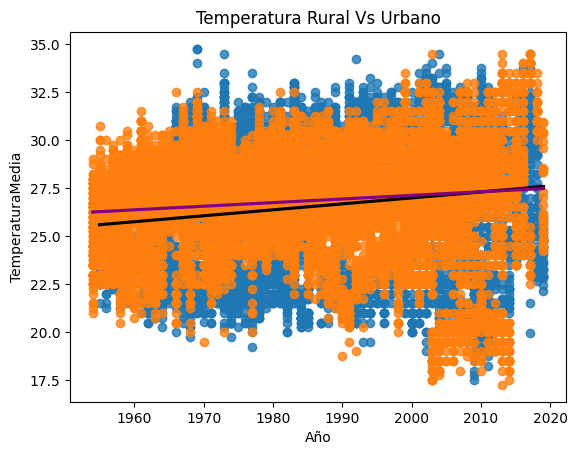

In [107]:
#Imprimiendo la tabla y obteniendo los datos de cada Regresión
print("El coeficiente de determinación de la zona Urbana es: ", detUrbano)
print("Mientras que el coeficiente de determinación de la zona rural es: ", detRural)
print("La linea Urbana intercepta en ", regUrbano.intercept_, "y tiene una pendiente de", regUrbano.coef_)
print("Mientras que la línea rural intercepta en ", regRural.intercept_, "y tiene una pendiente de", regRural.coef_)
sns.regplot(x=dfurbano["Año"], y = dfurbano["TemperaturaMedia"], ci = 95, line_kws = {"color": "black"})
sns.regplot(x=dfrural["Año"], y = dfrural["TemperaturaMedia"], ci = 95, line_kws = {"color": "purple"})
plt.title("Temperatura Rural Vs Urbano")